In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
a, b = 0, 1
n_values = [10, 20]

In [10]:
x_expect = np.linspace(a, b, 1000)
y_expect = 3.6 * x_expect ** 2 - 3.6 * x_expect + np.exp(x_expect) + 1 / np.exp(x_expect) - 2

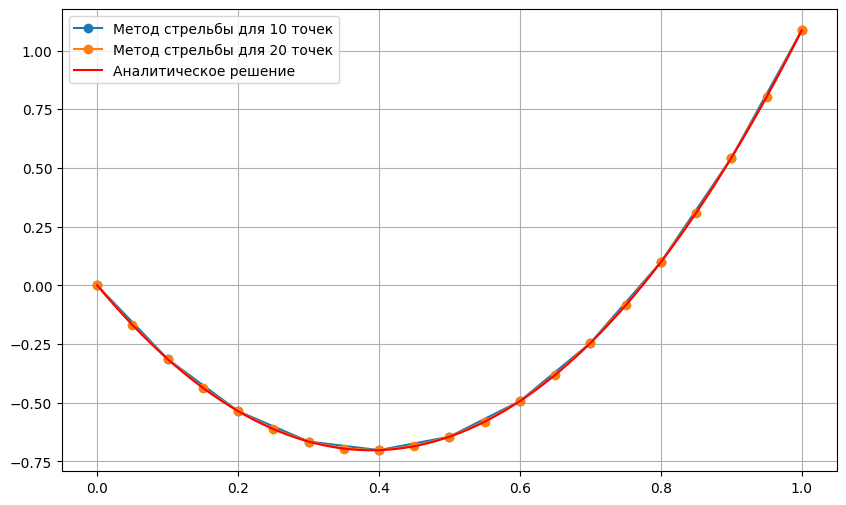

In [11]:
def f(x, Y):
    return np.array([Y[1], Y[0] + 3.6 * x * (1 - x) + 9.2])


def rk4_step(x, Y, h):
    k1 = f(x, Y)
    k2 = f(x + h / 2, Y + h * k1 / 2)
    k3 = f(x + h / 2, Y + h * k2 / 2)
    k4 = f(x + h, Y + h * k3)
    return Y + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6


def adams_bashforth_3_step(Y, f_values, h):
    return Y + h / 12 * (23 * f_values[-1] - 16 * f_values[-2] + 5 * f_values[-3])


def adams_method(Y0, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    Y = np.zeros((n + 1, 2))
    Y[0] = Y0
    f_values = [f(x[0], Y[0])]

    for i in range(2):
        Y[i + 1] = rk4_step(x[i], Y[i], h)
        f_values.append(f(x[i + 1], Y[i + 1]))

    for i in range(2, n):
        Y[i + 1] = adams_bashforth_3_step(Y[i], f_values, h)
        f_values.append(f(x[i + 1], Y[i + 1]))
        f_values.pop(0)

    return Y


def shooting_method(n):
    eps = 1e-5
    max_iter = 100
    mu_low, mu_high = -10, 10

    for _ in range(max_iter):
        mu_mid = (mu_low + mu_high) / 2
        Y = adams_method([0, mu_mid], n)
        dy_b = Y[-1, 0]
        phi = dy_b - np.exp(1) - np.exp(-1) + 2

        if abs(phi) < eps:
            break

        if phi > 0:
            mu_high = mu_mid
        else:
            mu_low = mu_mid

    return Y[:, 0]


plt.figure(figsize=(10, 6))

for n in n_values:
    x = np.linspace(a, b, n + 1)
    y_shoot = shooting_method(n)
    plt.plot(x, y_shoot, label=f"Метод стрельбы для {n} точек", marker='o')

plt.plot(x_expect, y_expect, label="Аналитическое решение", color='red')

plt.legend()
plt.grid(True)

plt.show()


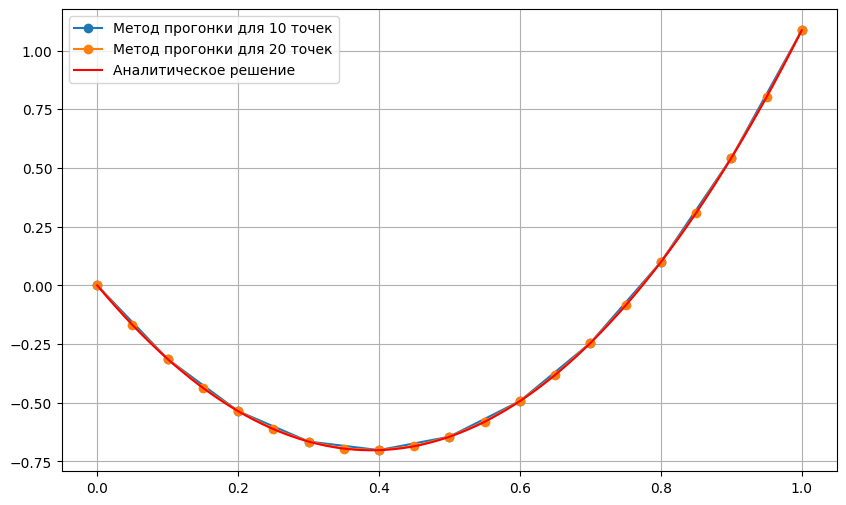

In [12]:
def q(x):
    return 9.2 + 3.6 * x - 3.6 * x ** 2


def progonka(n, a, b):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)

    A = np.zeros((n + 1, n + 1))
    B = np.zeros(n + 1)

    for i in range(1, n):
        A[i, i - 1] = 1
        A[i, i] = -2 - (h ** 2)
        A[i, i + 1] = 1
        B[i] = (h ** 2) * q(x[i])

    A[0, 0] = 1
    A[n, n] = 1
    B[0] = 0
    B[n] = np.exp(1) + np.exp(-1) - 2

    _lambda = np.zeros(n + 1)
    mu = np.zeros(n + 1)

    for i in range(1, n + 1):
        denominator = h * h + 2 - _lambda[i - 1]
        _lambda[i] = 1 / denominator
        mu[i] = (mu[i - 1] - h * h * (3.6 * x[i] * (1 - x[i]) + 9.2)) / denominator

    _lambda[-1] = 0
    mu[-1] = np.exp(1) + 1 / np.exp(1) - 2

    y = np.zeros(n + 1)
    y_temp = mu[-1]
    for i in range(n, -1, -1):
        y_temp = _lambda[i] * y_temp + mu[i]
        y[i] = y_temp

    return y


plt.figure(figsize=(10, 6))

for n in n_values:
    x = np.linspace(a, b, n + 1)
    y_progonka = progonka(n, a, b)
    plt.plot(x, y_progonka, label=f"Метод прогонки для {n} точек", marker='o')

plt.plot(x_expect, y_expect, label="Аналитическое решение", color='red')

plt.legend()
plt.grid(True)
plt.show()


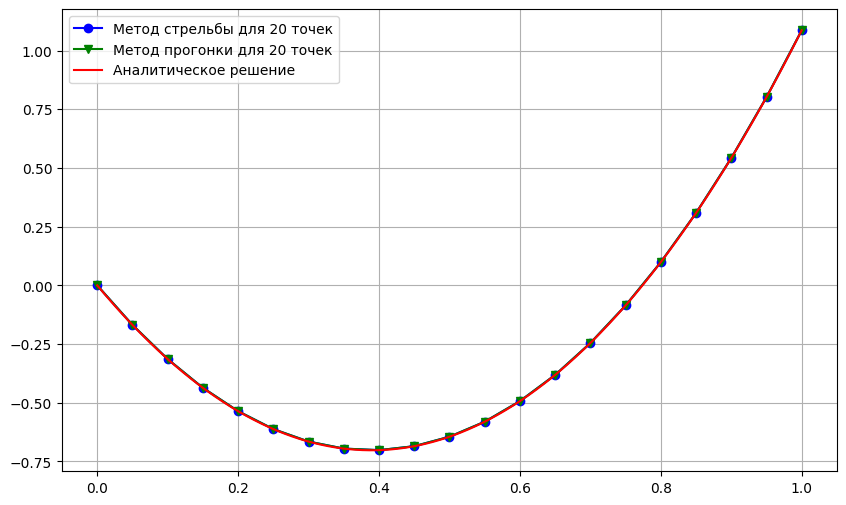

In [13]:
plt.figure(figsize=(10, 6))
x = np.linspace(a, b, 21)
y_shoot = shooting_method(20)
y_progonka = progonka(20, a, b)
plt.plot(x, y_shoot, label="Метод стрельбы для 20 точек", color='blue', marker='.')
plt.plot(x, y_progonka, label="Метод прогонки для 20 точек", color='green', marker='.')
plt.plot(x_expect, y_expect, label="Аналитическое решение", color='red')

plt.legend()
plt.grid(True)

plt.show()

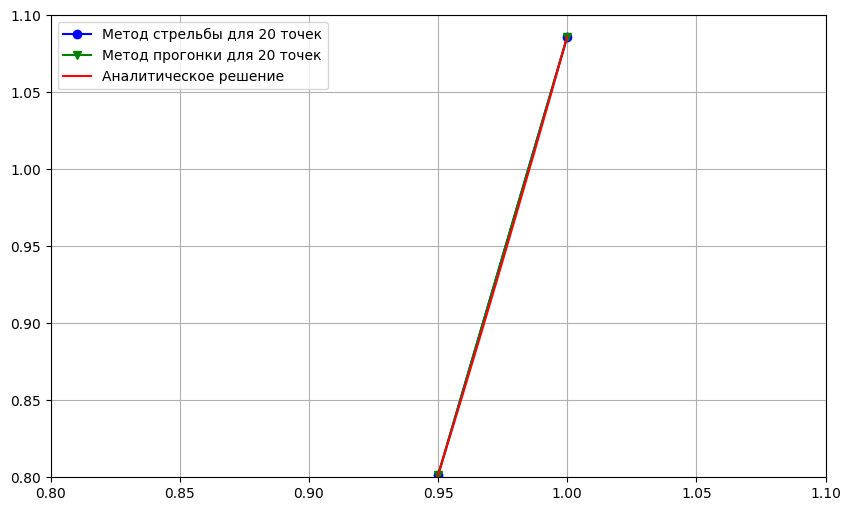

In [14]:
plt.figure(figsize=(10, 6))
x = np.linspace(a, b, 21)
y_shoot = shooting_method(20)
y_progonka = progonka(20, a, b)
plt.plot(x, y_shoot, label="Метод стрельбы для 20 точек", color='blue', marker='.')
plt.plot(x, y_progonka, label="Метод прогонки для 20 точек", color='green', marker='.')
plt.plot(x_expect, y_expect, label="Аналитическое решение", color='red')

plt.legend()
plt.xlim([0.8, 1.1])
plt.ylim([0.8, 1.1])
plt.xticks(np.arange(0.80, 1.1, 0.05))
plt.yticks(np.arange(0.8, 1.1, 0.05))
plt.grid(True)

plt.show()